# 7. Comparando Resultados


In [1]:
# Bibliotecas básicas 
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns

# Definições estéticas
plt.style.use('ggplot')
color_pal = sns.color_palette()
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
# Base de dados
treino = pd.read_csv('/content/treino.csv')
teste = pd.read_csv('/content/teste.csv')
teste_prophet = pd.read_csv('/content/teste_prophet.csv')
teste_rnn = pd.read_csv('/content/teste_rnn.csv')
#teste_sarimax = pd.read_csv('/content/teste_sarimax.csv')
teste_xgb = pd.read_csv('/content/teste_xgb.csv')

def create_index(df):
    df = df.set_index('Datetime')
    df.index = pd.to_datetime(df.index)
    return df

treino = create_index(treino)
teste = create_index(teste)
teste_prophet = create_index(teste_prophet)
teste_rnn = create_index(teste_rnn)
#teste_sarimax = create_index(teste_sarimax)
teste_xgb = create_index(teste_xgb)

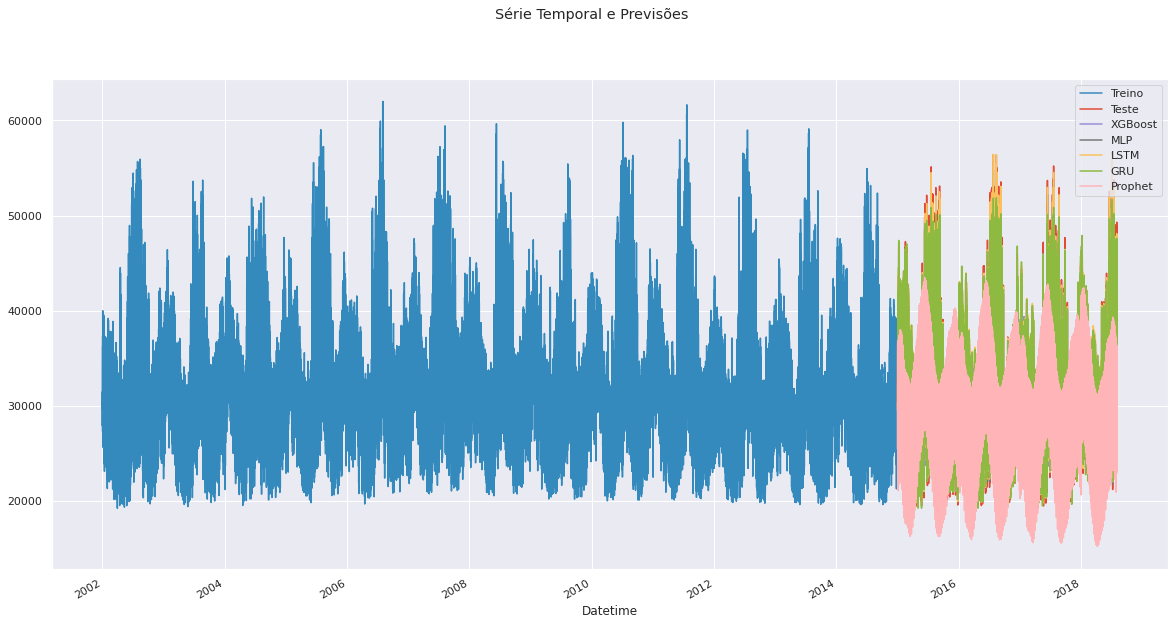

In [3]:
# Plotando o gráfco
treino['PJME_MW'].plot(legend=True, label='Treino', color=color_pal[1]) 
teste['PJME_MW'].plot(legend=True, label='Teste', color=color_pal[0])

teste_xgb['XGBoost'].plot(legend=True, label='XGBoost', color=color_pal[2])
teste_rnn['MLP'].plot(legend=True, label='MLP', color=color_pal[3])
teste_rnn['LSTM'].plot(legend=True, label='LSTM', color=color_pal[4])
teste_rnn['GRU'].plot(legend=True, label='GRU', color=color_pal[5])
teste_prophet['Prophet'].plot(legend=True, label='Prophet', color=color_pal[6])
#teste_sarimax['SARIMAX'].plot(legend=True, label='SARIMAX', color=color_pal[5])

plot = plt.suptitle('Série Temporal e Previsões')

Será utilizado o Mean Absolute Error Percentage (MAPE) para escolha do melhor modelo. A MAPE é dada por:
$$
 MAPE = \sum_{t=1}^{n} \frac{|y_{t}-\hat{y}_{t}|}{y_{t}}.
$$

In [4]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [5]:
teste_rnn[4:]

,PJME_MW,MLP,LSTM,GRU
Datetime,,,,
2015-12-31 04:00:00,22330.0,23145.342,22854.516,23045.180
2015-12-31 05:00:00,22773.0,22957.346,23207.643,23395.752
2015-12-31 06:00:00,24106.0,23414.139,24277.832,24601.330
2015-12-31 07:00:00,26129.0,24721.605,26433.428,26502.527
2015-12-31 08:00:00,27660.0,26509.316,28339.197,28308.780
...,...,...,...,...
2018-01-01 20:00:00,44284.0,43319.770,43149.484,42960.870
2018-01-01 21:00:00,43751.0,43266.280,42842.207,42674.832
2018-01-01 22:00:00,42402.0,42762.406,41947.630,41769.734


In [6]:
mape_xgb = round(mape(teste['PJME_MW'][4:], teste_xgb['XGBoost'][4:]), 2)
mape_mlp = round(mape(teste['PJME_MW'][4:], teste_rnn['MLP'][4:]), 2)
mape_lstm = round(mape(teste['PJME_MW'][4:], teste_rnn['LSTM'][4:]), 2)
mape_gru = round(mape(teste['PJME_MW'][4:], teste_rnn['GRU'][4:]), 2)
mape_prophet = round(mape(teste['PJME_MW'][4:], teste_prophet['Prophet'][4:]), 2)
#mape_sarimax = round(mape(teste['PJME_MW'], teste_sarimax['SARIMAX']), 2)

df_mape = pd.DataFrame(
    {
        'Modelos': ['XGBoost', 'MLP', 'LSTM', 'GRU', 'Prophet'],
        'MAPE': [mape_xgb, mape_mlp, mape_lstm, mape_gru, mape_prophet]
    }
)

In [7]:
df_mape.sort_values(by=['MAPE'])

,Modelos,MAPE
2,LSTM,0.03
3,GRU,0.03
1,MLP,0.04
0,XGBoost,0.09
4,Prophet,0.19
